# Analyse exploratoire, traitements, modélisation des données

## 0 - Chargement des librairies et du dataset

In [169]:
import pandas as pd
from skimpy import skim 

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import kruskal
import scikit_posthocs as sp

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [89]:
df = pd.read_csv(r'https://raw.githubusercontent.com/MaskiVal/DataSets/main/cancer_breast.csv')

## 1 - Exploration des données

#### 1.1.1 - Nombre de données, visualisation des colonnes du dataset

In [90]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [91]:
df.shape

(569, 33)

#### 1.1.2 - Observation des types de données

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

#### 1.1.3 - Observation des valeurs Null

In [93]:
df_expl = df.drop(columns='Unnamed: 32', axis= 1)

df_expl[df_expl.isna().any(axis= 1)]

Empty DataFrame
Columns: [id, diagnosis, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave points_worst, symmetry_worst, fractal_dimension_worst]
Index: []

[0 rows x 32 columns]

Il n'y a pas de valeurs null dans le dataset mis à part sur la colonne Unamed : 32 --> 100% null

### 1.2 - Observation des variables numériques

#### 1.2.1 - Analyse de la distribution

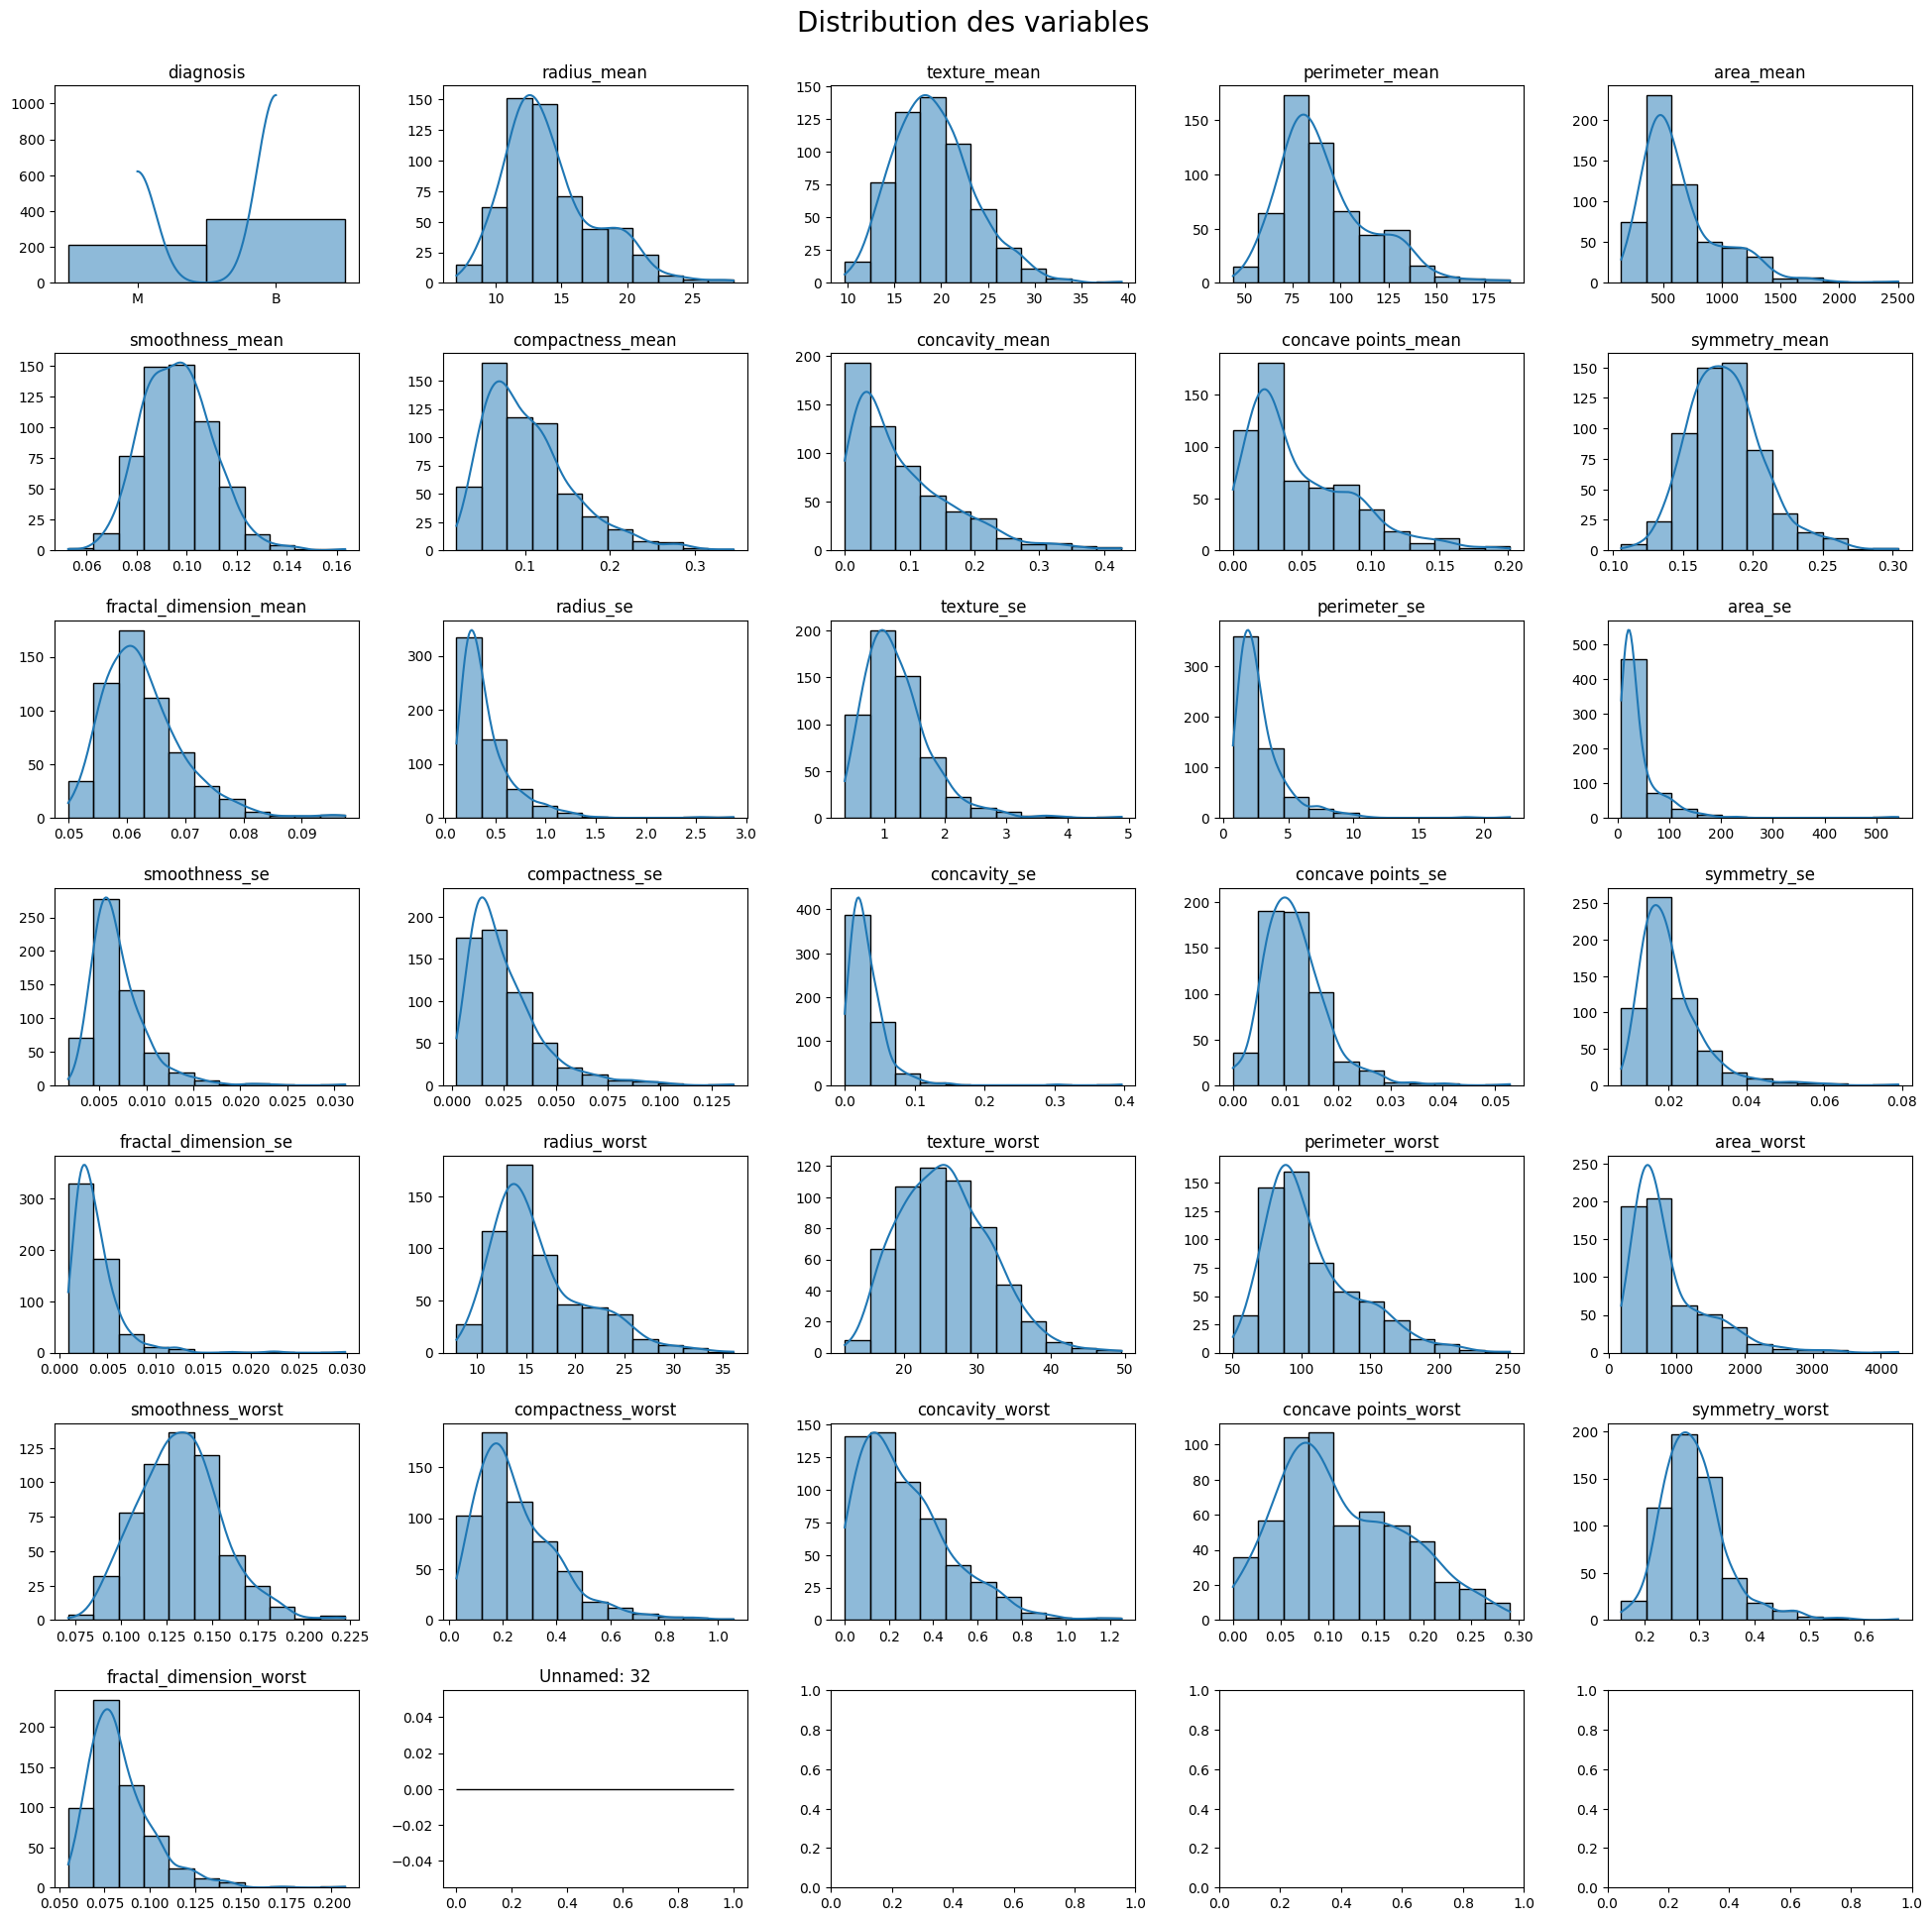

In [94]:
fig, axes = plt.subplots(7, 5, figsize=(20, 20))
fig.suptitle('Distribution des variables', fontsize=20)
fig.tight_layout(pad=3.0)

for i, col in enumerate(df.columns[1:]):
    sns.histplot(df[col], bins='sturges', kde=True, ax=axes[i//5, i%5])
    axes[i//5, i%5].set_title(col)
    axes[i//5, i%5].set_xlabel('')
    axes[i//5, i%5].set_ylabel('')

plt.show()

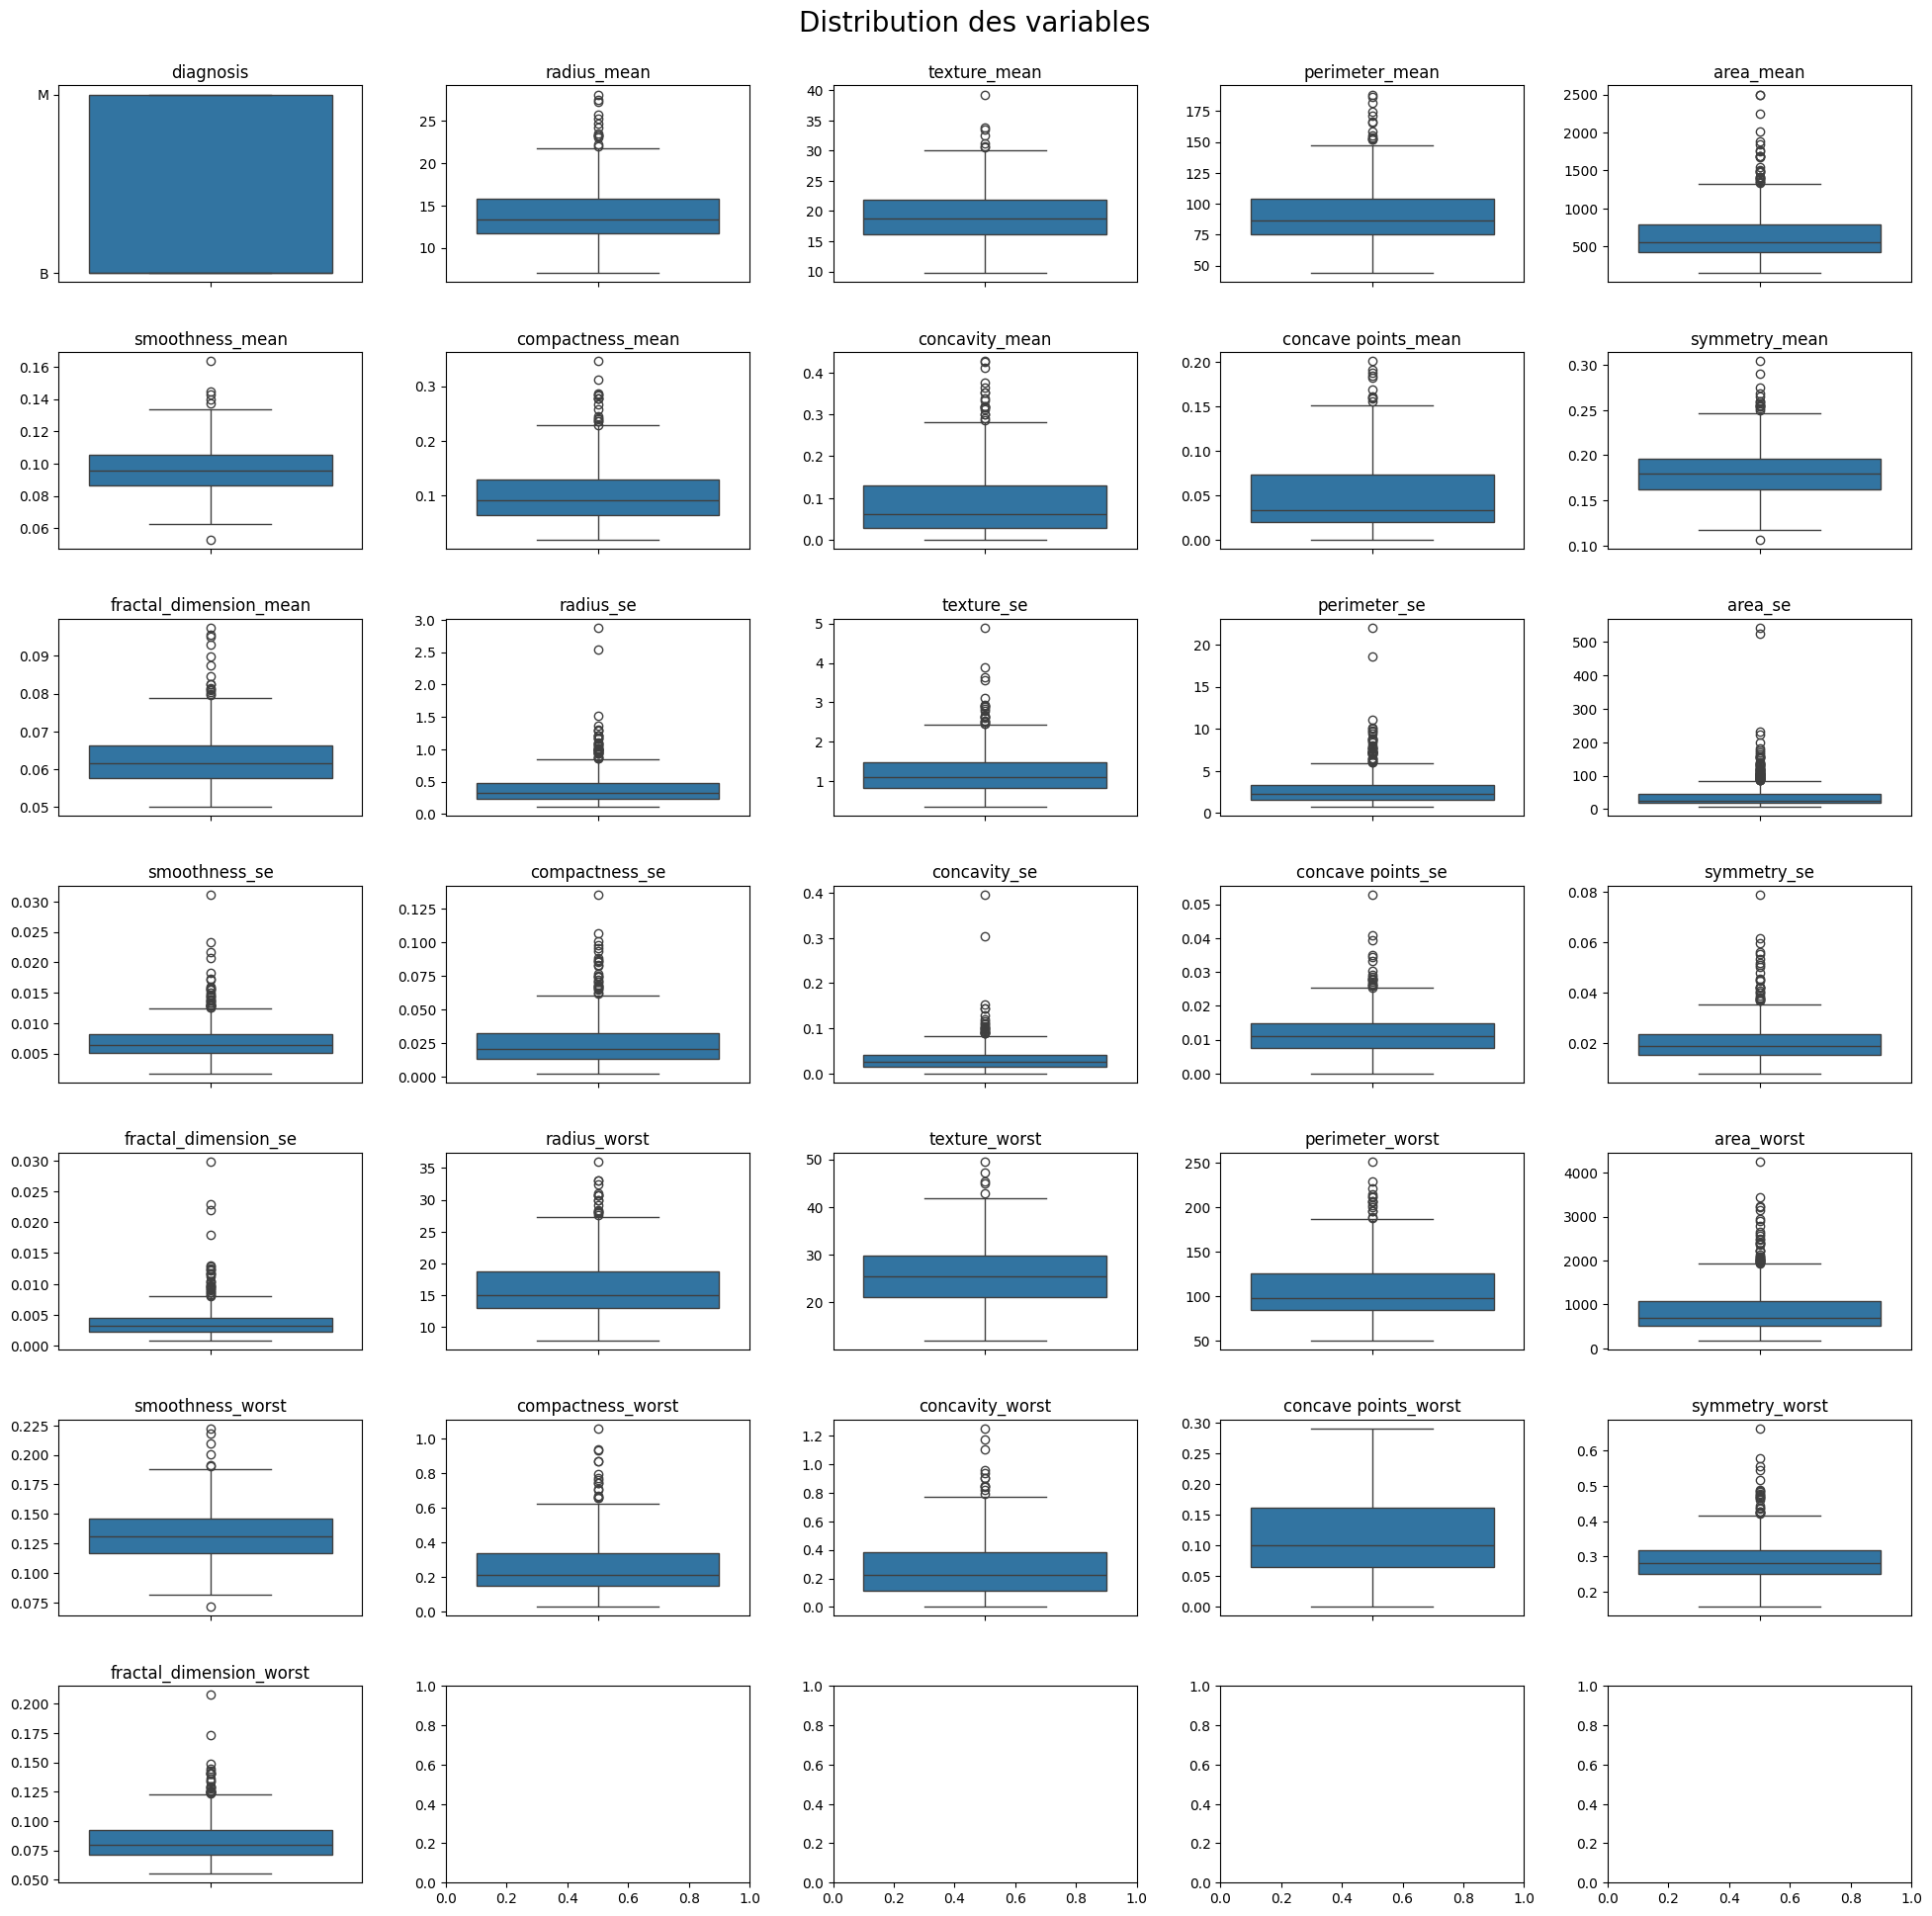

In [95]:
'''
Observation des data pour observer les outliers 
suite à l'observation des distributions sur les variables
'''

fig, axes = plt.subplots(7, 5, figsize=(20, 20))
fig.suptitle('Distribution des variables', fontsize=20)
fig.tight_layout(pad=3.0)

for i, col in enumerate(df_expl.columns[1:]):
    sns.boxplot(df_expl[col],  ax=axes[i//5, i%5])
    axes[i//5, i%5].set_title(col)
    axes[i//5, i%5].set_xlabel('')
    axes[i//5, i%5].set_ylabel('')

plt.show()

D'après les définitions des variables et les valeurs attendu il ne devraient y avoir des outliers que sur la patie supérieures (et non en dessous de Q1)
#### Commentaire sur les outliers Q1:
Symetry mean : les outliers petit n'ont pas de sens et semble être une valeure abérante
Smoothness mean et worst : l'outliers faible montre une celule très lisse , la valeure semble abérante

#### Commentaires sur les outliers Q3:
L'ensembles des outliers de ce type pourrait correspondre à des carractéristiques de cellules Malines -> avec mon niveau de connaissance, je ne peut pas me prononcer sur le fait que ce soient des valeurs abérantes ou non.

#### 1.2.2 - Analyse statique descriptive de base

In [96]:
df.describe().T

count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               569.0  1.216853e+00  5.516484e-01     0.360200   
perimeter_se             569.0  2.866059e+00  2.021855e+00     0.757000   
area_se                  569.0  4.033708e+01  4.549101e+01     6.802000   
smoothness_se            569.0  7.040979e-03  3.002518e-03     0.001713   
compactness_se           569.0  2.547814e-02  1.790818e-02     0.002252   
concavity_se             569.0  3.189372e-02  3.018606e-02     0.000000   
concave points_se        569.0  1.179614e-02  6.170285e-03     0.000000   
symmetry_se              569.0  2.054230e-02  8.266372e-03     0.007882   
fractal_dimension_se     569.0  3.794904e-03  2.646071e-03     0.000895   
radius_worst             569.0  1.626919e+01  4.833242e+00     7.930000   
texture_worst            569.0  2.567722e+01  6.146258e+00    12.020000   
perimeter_worst          569.0  1.072612e+02  3.360254e+01    50.410000   
area_worst               569.0  8.805831e+02  5.693570e+02   185.200000   
smoothness_worst         569.0  1.323686e-01  2.283243e-02     0.071170   
compactness_worst        569.0  2.542650e-01  1.573365e-01     0.027290   
concavity_worst          569.0  2.721885e-01  2.086243e-01     0.000000   
concave points_worst     569.0  1.146062e-01  6.573234e-02     0.000000   
symmetry_worst           569.0  2.900756e-01  6.186747e-02     0.156500   
fractal_dimension_worst  569.0  8.394582e-02  1.806127e-02     0.055040   
Unnamed: 32                0.0           NaN           NaN          NaN   

                                   25%            50%           75%  \
id                       869218.000000  906024.000000  8.813129e+06   
radius_mean                  11.700000      13.370000  1.578000e+01   
texture_mean                 16.170000      18.840000  2.180000e+01   
perimeter_mean               75.170000      86.240000  1.041000e+02   
area_mean                   420.300000     551.100000  7.827000e+02   
smoothness_mean               0.086370       0.095870  1.053000e-01   
compactness_mean              0.064920       0.092630  1.304000e-01   
concavity_mean                0.029560       0.061540  1.307000e-01   
concave points_mean           0.020310       0.033500  7.400000e-02   
symmetry_mean                 0.161900       0.179200  1.957000e-01   
fractal_dimension_mean        0.057700       0.061540  6.612000e-02   
radius_se                     0.232400       0.324200  4.789000e-01   
texture_se                    0.833900       1.108000  1.474000e+00   
perimeter_se                  1.606000       2.287000  3.357000e+00   
area_se                      17.850000      24.530000  4.519000e+01   
smoothness_se                 0.005169       0.006380  8.146000e-03   
compactness_se                0.013080       0.020450  3.245000e-02   
concavity_se                  0.015090       0.025890  4.205000e-02   
concave points_se             0.007638       0.010930  1.471000e-02   
symmetry_se                   0.015160       0.018730  2.348000e-02   
fractal_dimension_se          0.002248       0.003187  4.5

In [97]:
# Observation des valeurs à zéro et des colonnes associés 
# enregistrement dans liste du numero id de chaque ligne contenant au moins un zero

id_avec_des_0 = []

for col in df.columns:
    
    if len(df[df[col] == 0]) != 0:
        df_new = df[df[col] == 0]

        print(f'{col} : {len(df[df[col] == 0])}')

        # ajout de l'index dans une liste
        for ligne in df_new['id']:
            id_avec_des_0.append(ligne)

# set de la liste pour recuupérer les id
id_avec_des_0 = set(id_avec_des_0)

id_avec_des_0

concavity_mean : 13
concave points_mean : 13
concavity_se : 13
concave points_se : 13
concavity_worst : 13
concave points_worst : 13


{92751,
 862722,
 868999,
 871642,
 872113,
 875099,
 894047,
 903483,
 921092,
 923748,
 925236,
 925311,
 9113846}

##### Les valeurs à zéro sur les varaiables suivantes ont-elle un sens ?
concavity_mean  
concave points_mean  
concavity_se  
concave points_se  
concavity_worst  
concave points_worst  

--> vu avec le client : suppression de ces lignes

### 1.3 - Observation des variables catégoritielles

#### 1.3.1 - Analyse du nombre de valeurs unique

In [98]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [99]:
df['diagnosis'].value_counts(normalize=True)

diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64

#### 1.3.2 - Analyse des  statistique de base

In [100]:
'''
L'analyse n'est pas nécessaire sur les données catégoritiles, uniquement le diagnostique
'''

"\nL'analyse n'est pas nécessaire sur les données catégoritiles, uniquement le diagnostique\n"

## 2 - Nettoyage des données

### 2.1 - Traitement des valeurs manquantes

In [101]:
'''
Aucune valeur manquante ormis sur le uname:32 --> drop de la colonne
'''
df.drop(columns='Unnamed: 32', axis= 1, inplace=True)

### 2.2 - Traitement des doublons

In [102]:
'''
Aucun doublon dans le dataset en se basant sur la colonne d'index
les autres valeurs sont des valeurs continues avec une distrubution qui semble conforme
'''

"\nAucun doublon dans le dataset en se basant sur la colonne d'index\nles autres valeurs sont des valeurs continues avec une distrubution qui semble conforme\n"

### 2.3 - Traitement des valeurs abérantes

Les outliers ne sont pas à éliminé --> vu client

In [103]:
# def remove_outliers_iqr(df):
#     numeric_columns = df.select_dtypes(include=['number']).columns

#     for column in numeric_columns[1:]:
#         Q1 = df[column].quantile(0.25)
#         Q3 = df[column].quantile(0.75)
#         IQR = Q3 - Q1

#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR

#         # suppression des outliers Q1 -1.5*IQR
#         df = df[(df[column] >= lower_bound)]
#         # supp des outiliers Q3+1.5
#         # df = df[(df[column] <= upper_bound)]
    
#     return df

In [104]:
# df_cleaned = remove_outliers_iqr(df)

df_cleaned = df

In [105]:
# Suppression des lignes ouù il y a des valeurs à zéro --> Vu avec le client 
id_avec_des_0

df_cleaned = df_cleaned[~df_cleaned['id'].isin(id_avec_des_0)]

## 3 - Visualisation des données nettoyées

In [106]:
# Séparation en 3 dataframe : mean, se, worst
df_cleaned_mal = df_cleaned[df_cleaned.columns[1:2]]

df_cleaned_mean = pd.concat([df_cleaned_mal, df_cleaned[df_cleaned.columns[2:12]]], axis = 1)
df_cleaned_se = pd.concat([df_cleaned_mal, df_cleaned[df_cleaned.columns[12:22]]], axis = 1)
df_cleaned_worst = pd.concat([df_cleaned_mal, df_cleaned[df_cleaned.columns[22:32]]], axis = 1)

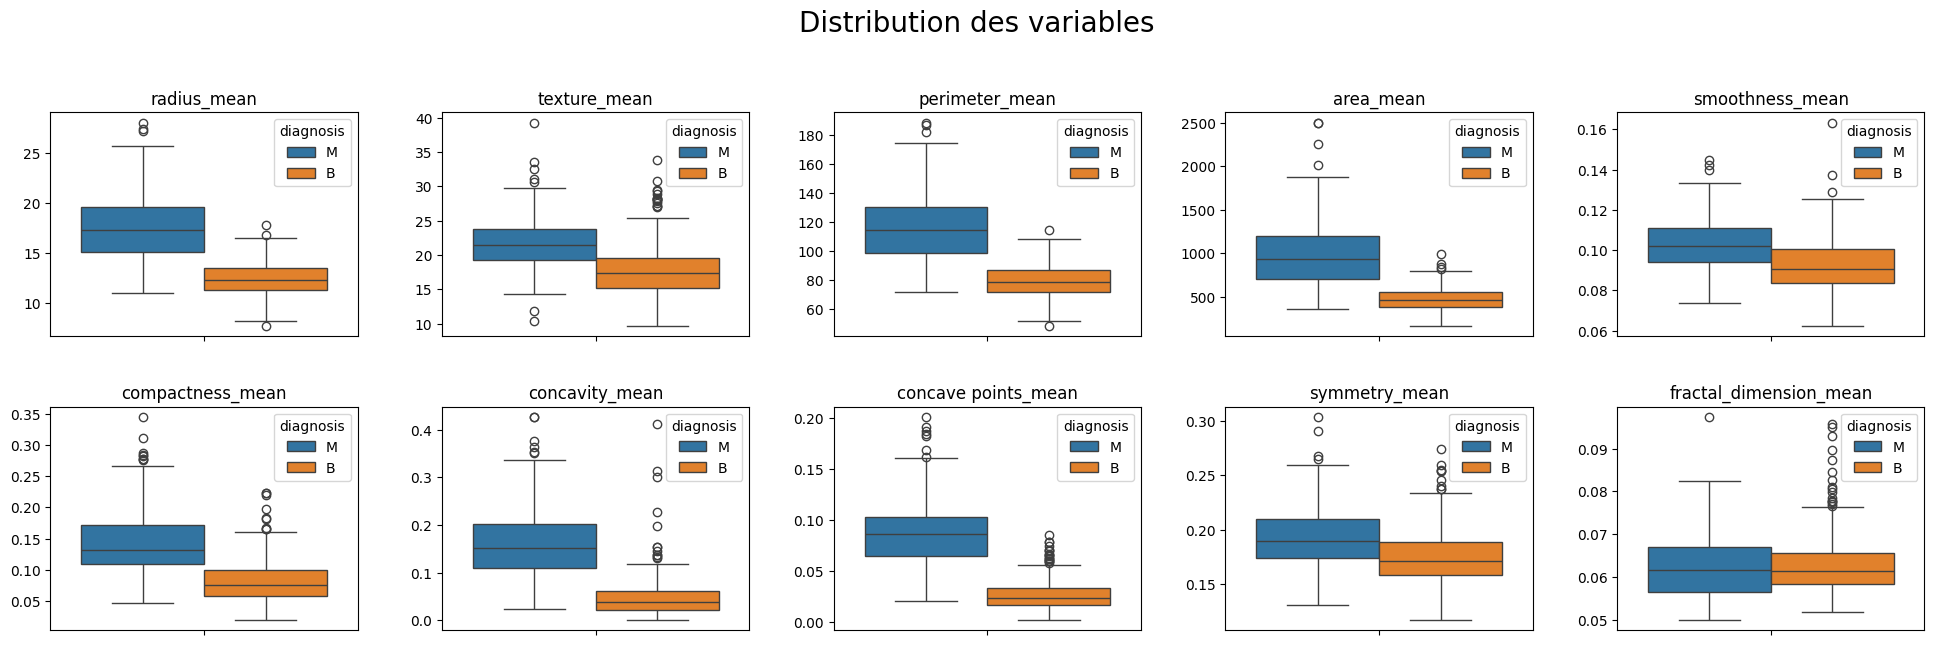

In [107]:
'''
Observation des data mean
'''

fig, axes = plt.subplots(2, 5, figsize=(20, 7))
fig.suptitle('Distribution des variables', fontsize=20)
fig.tight_layout(pad=3.0)

for i, col in enumerate(df_cleaned_mean.columns[1:]):
    sns.boxplot(data=df_cleaned_mean, y= col,  ax=axes[i//5, i%5], hue='diagnosis')
    axes[i//5, i%5].set_title(col)
    axes[i//5, i%5].set_xlabel('')
    axes[i//5, i%5].set_ylabel('')

plt.show()

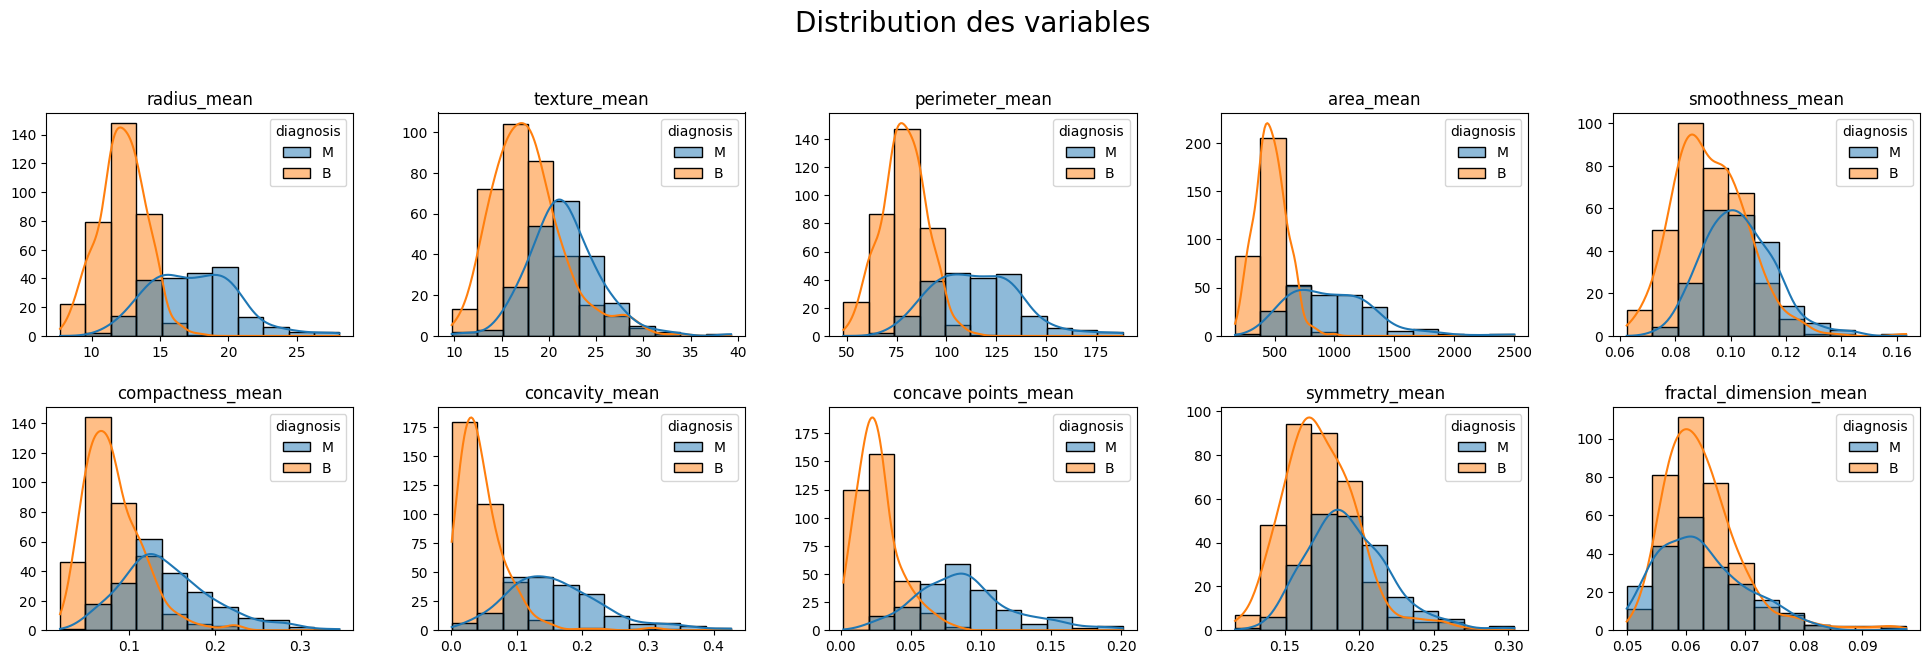

In [108]:
fig, axes = plt.subplots(2, 5, figsize=(20, 7))
fig.suptitle('Distribution des variables', fontsize=20)
fig.tight_layout(pad=3.0)

for i, col in enumerate(df_cleaned_mean.columns[1:]):
    sns.histplot(df_cleaned_mean, x=col, hue='diagnosis', bins='sturges', kde=True, ax=axes[i//5, i%5])
    axes[i//5, i%5].set_title(col)
    axes[i//5, i%5].set_xlabel('')
    axes[i//5, i%5].set_ylabel('')

plt.show()

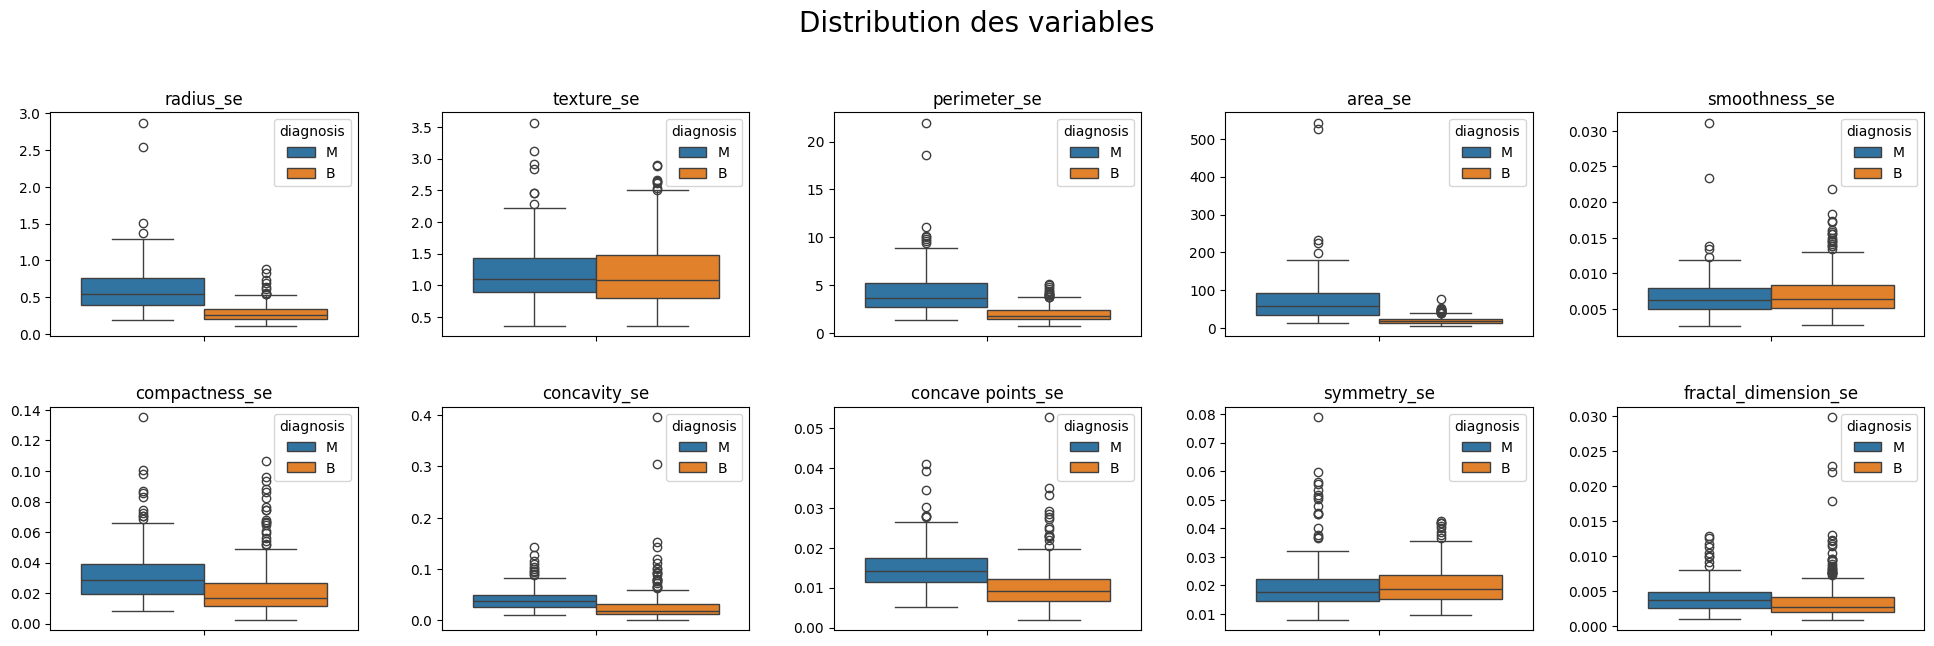

In [109]:
'''
Observation des data se
'''

fig, axes = plt.subplots(2, 5, figsize=(20, 7))
fig.suptitle('Distribution des variables', fontsize=20)
fig.tight_layout(pad=3.0)

for i, col in enumerate(df_cleaned_se.columns[1:]):
    sns.boxplot(data=df_cleaned_se, y= col,  ax=axes[i//5, i%5], hue='diagnosis')
    axes[i//5, i%5].set_title(col)
    axes[i//5, i%5].set_xlabel('')
    axes[i//5, i%5].set_ylabel('')

plt.show()

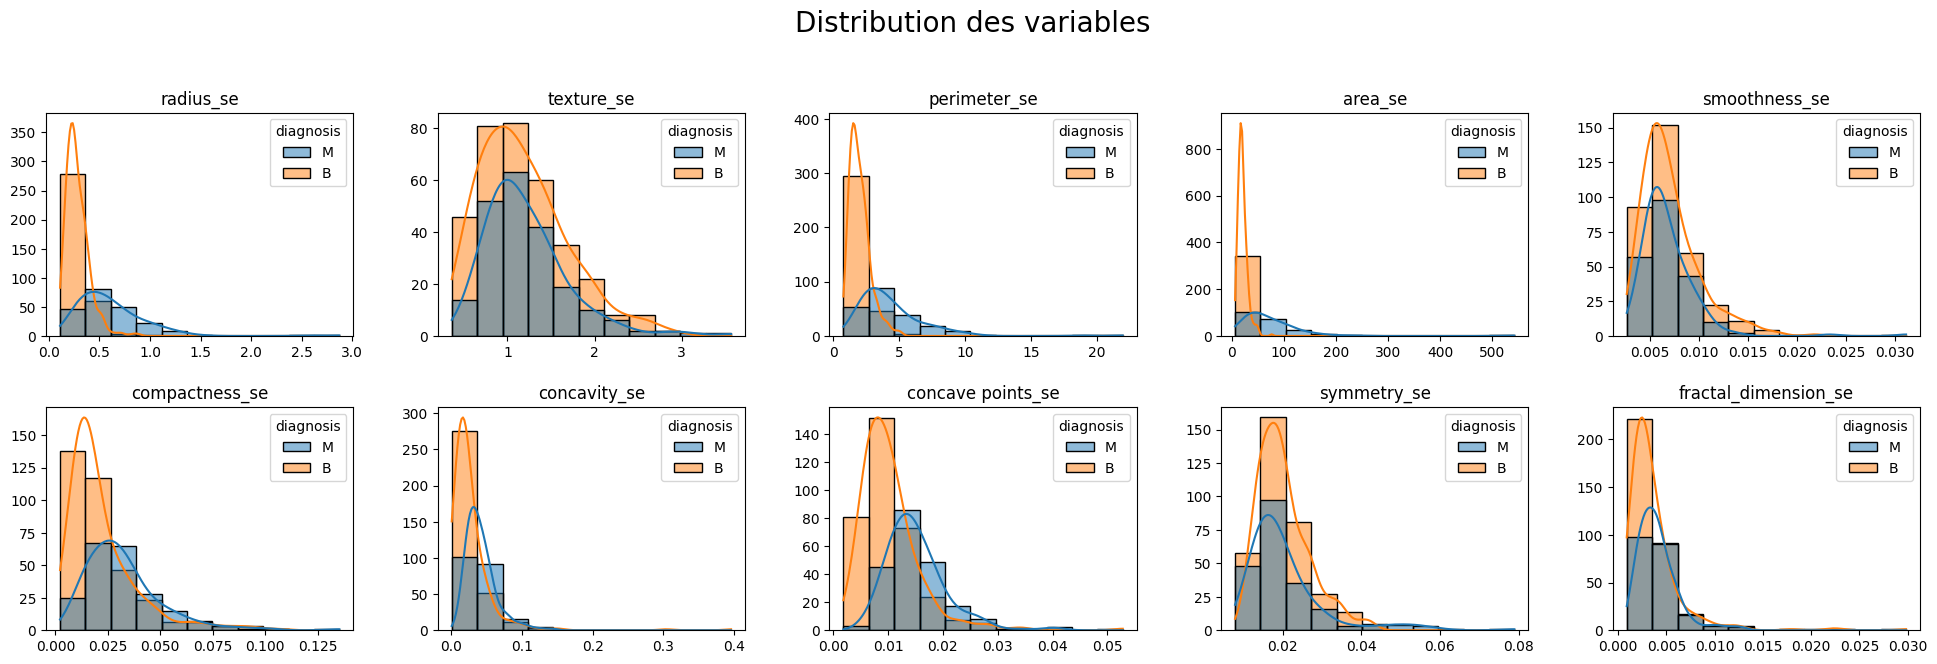

In [110]:
fig, axes = plt.subplots(2, 5, figsize=(20, 7))
fig.suptitle('Distribution des variables', fontsize=20)
fig.tight_layout(pad=3.0)

for i, col in enumerate(df_cleaned_se.columns[1:]):
    sns.histplot(df_cleaned_se, x=col, hue='diagnosis', bins='sturges', kde=True, ax=axes[i//5, i%5])
    axes[i//5, i%5].set_title(col)
    axes[i//5, i%5].set_xlabel('')
    axes[i//5, i%5].set_ylabel('')

plt.show()

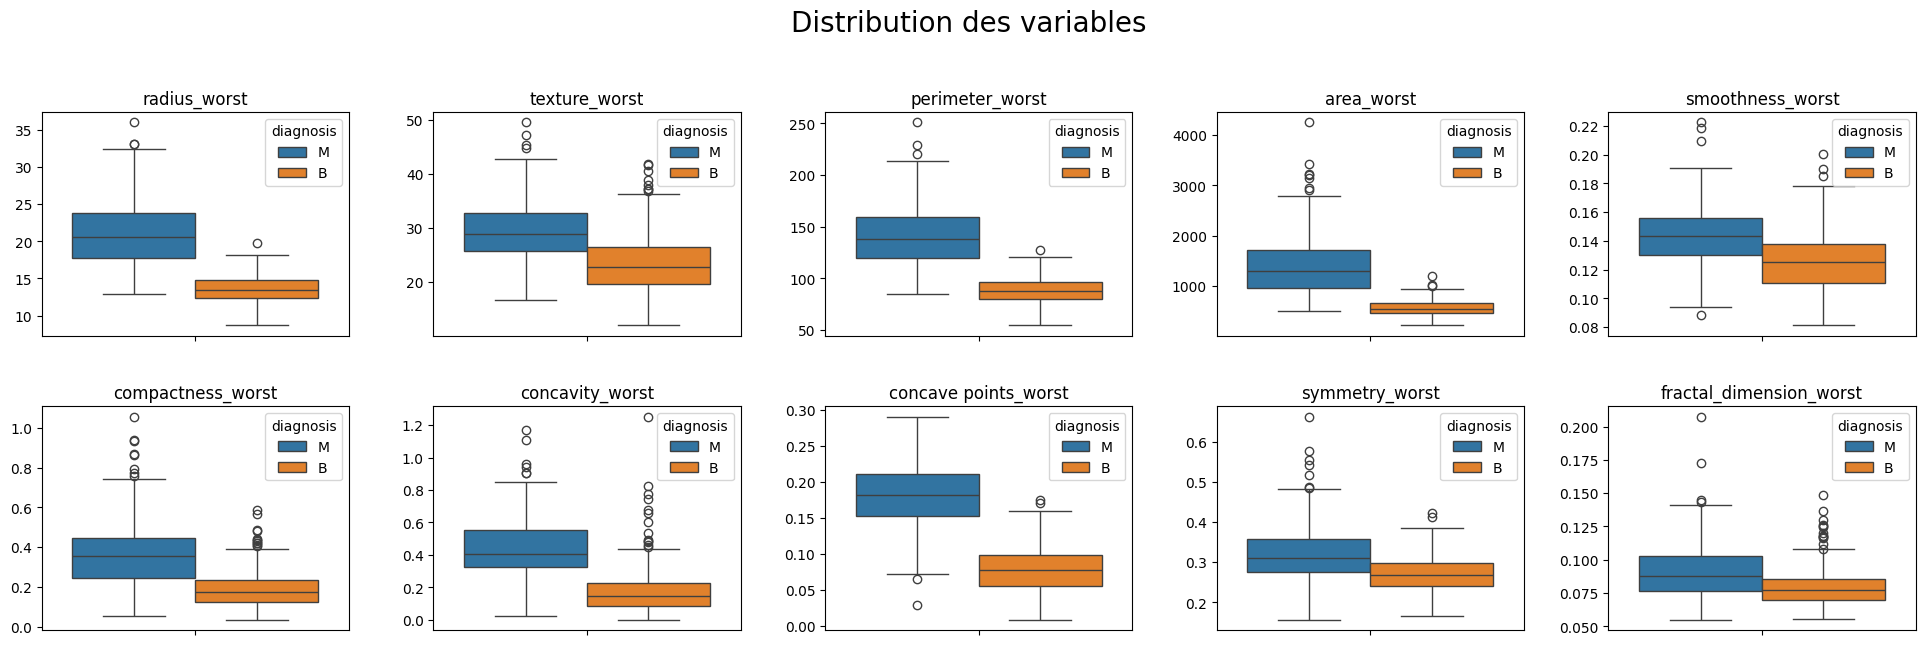

In [111]:
'''
Observation des data mean
'''

fig, axes = plt.subplots(2, 5, figsize=(20, 7))
fig.suptitle('Distribution des variables', fontsize=20)
fig.tight_layout(pad=3.0)

for i, col in enumerate(df_cleaned_worst.columns[1:]):
    sns.boxplot(data=df_cleaned_worst, y= col,  ax=axes[i//5, i%5], hue='diagnosis')
    axes[i//5, i%5].set_title(col)
    axes[i//5, i%5].set_xlabel('')
    axes[i//5, i%5].set_ylabel('')

plt.show()

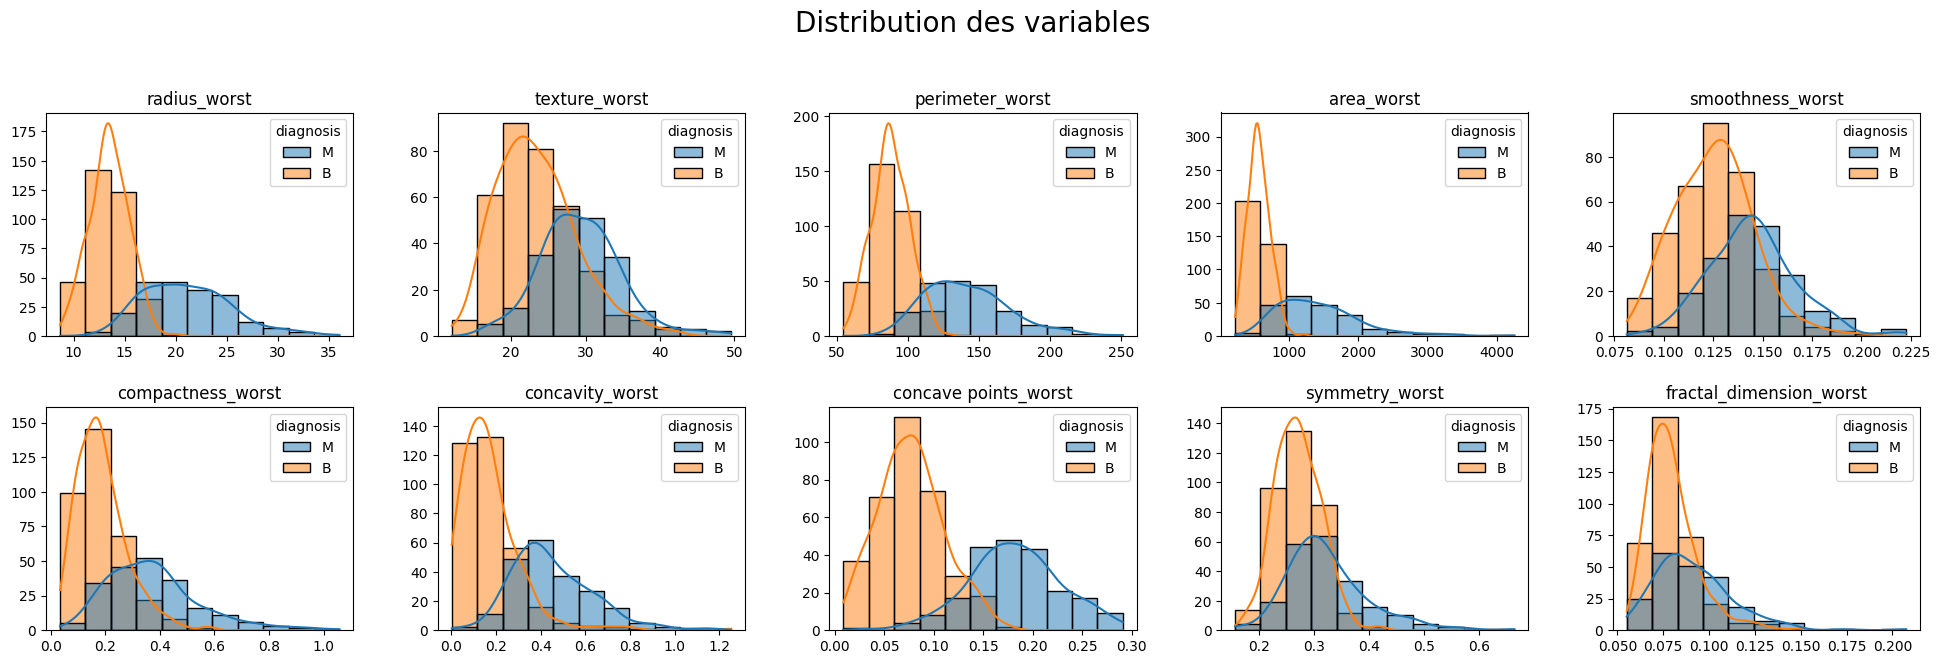

In [112]:
fig, axes = plt.subplots(2, 5, figsize=(20, 7))
fig.suptitle('Distribution des variables', fontsize=20)
fig.tight_layout(pad=3.0)

for i, col in enumerate(df_cleaned_worst.columns[1:]):
    sns.histplot(df_cleaned_worst, x=col, hue='diagnosis', bins='sturges', kde=True, ax=axes[i//5, i%5])
    axes[i//5, i%5].set_title(col)
    axes[i//5, i%5].set_xlabel('')
    axes[i//5, i%5].set_ylabel('')

plt.show()

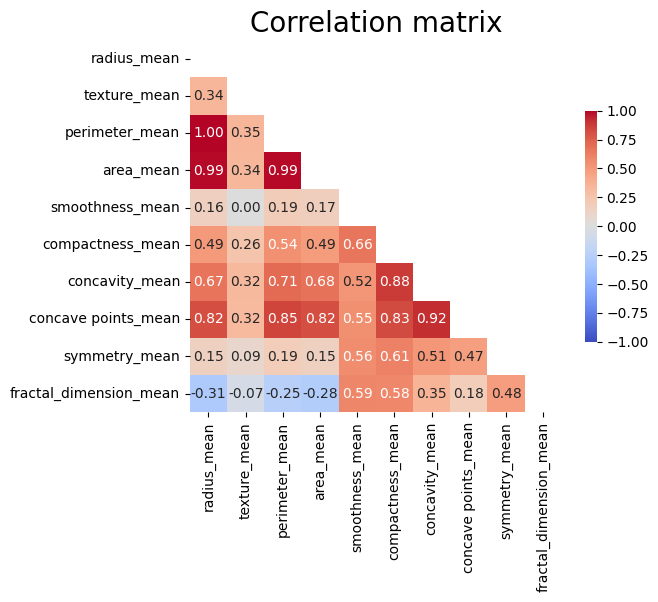

In [113]:
# observation des corrélations
list_columns_corr = [col for col in df_cleaned_mean.columns if (col != 'id') and (col != 'diagnosis')]


plt.figure(figsize=(6, 6))
corr = df_cleaned_mean[list_columns_corr].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .5}, vmin=-1, vmax=1)
plt.title('Correlation matrix', fontsize=20)
plt.show()

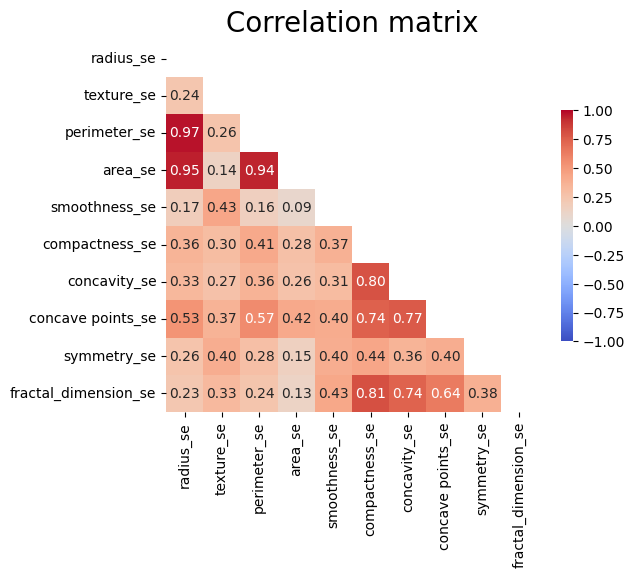

In [114]:
# observation des corrélations
list_columns_corr = [col for col in df_cleaned_se.columns if (col != 'id') and (col != 'diagnosis')]


plt.figure(figsize=(6, 6))
corr = df_cleaned_se[list_columns_corr].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .5}, vmin=-1, vmax=1)
plt.title('Correlation matrix', fontsize=20)
plt.show()

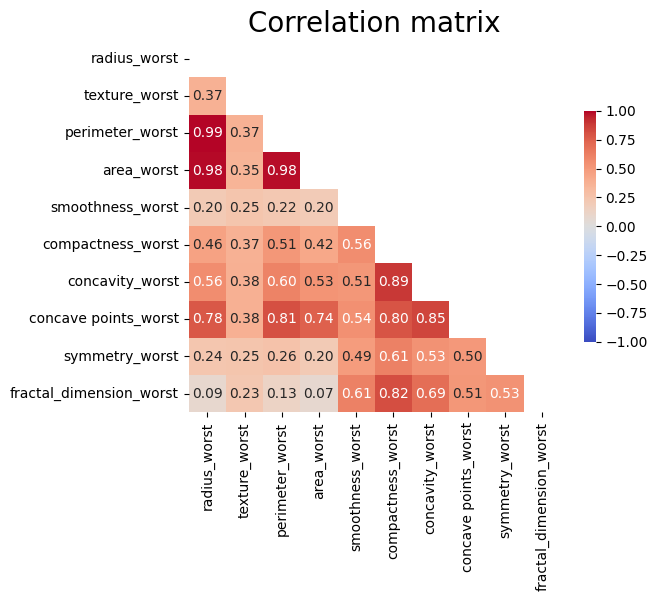

In [115]:
# observation des corrélations
list_columns_corr = [col for col in df_cleaned_worst.columns if (col != 'id') and (col != 'diagnosis')]


plt.figure(figsize=(6, 6))
corr = df_cleaned_worst[list_columns_corr].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .5}, vmin=-1, vmax=1)
plt.title('Correlation matrix', fontsize=20)
plt.show()

## 4 - Validation statistique pour l'interpretabilité des résultats

### 4.1 - Separation des variables en df_B et df_M

In [116]:
df_B_mean = df_cleaned_mean[df_cleaned_mean['diagnosis']== "B"]
df_M_mean = df_cleaned_mean[df_cleaned_mean['diagnosis']== "M"]

df_B_se = df_cleaned_se[df_cleaned_se['diagnosis']== "B"]
df_M_se = df_cleaned_se[df_cleaned_se['diagnosis']== "M"]

df_B_worst = df_cleaned_worst[df_cleaned_worst['diagnosis']== "B"]
df_M_worst = df_cleaned_worst[df_cleaned_worst['diagnosis']== "M"]

### 4.2 - Test sur les variables

<b>Sélection du Test</b>  

<u>Données normales et variances égales :</u> Utilisez le test t de Student.  

<u>Données normales et variances inégales :</u>  Utilisez le test t de Welch.  

<u>Données non normales :</u>  Utilisez le test de Mann-Whitney U ou Kruskal-Wallis (extension non paramétrique du test de Mann-Whitney U) ou le test de Kolmogorov-Smirnov.  

<u>Données catégorielles :</u>  Utilisez le test de chi-carré ou le test de Fisher.  

Test t de Student :

Objectif : Comparer les moyennes de deux échantillons indépendants.
Conditions : Les données doivent être normalement distribuées et les variances des deux échantillons doivent être égales (homoscédasticité).
Variante : Test t de Welch, utilisé lorsque les variances ne sont pas égales.

NB :  
Test de chi-carré :

Objectif : Comparer les distributions de deux variables catégorielles (si la variable est discrète).  
Conditions : Les données doivent être sous forme de comptage dans des catégories.
  
  
Test de Fisher :

Objectif : Comparer les proportions dans des tableaux de contingence pour des petits échantillons.  
Conditions : Utilisé lorsque les effectifs des catégories sont petits.

Test de Mann-Whitney U (ou test de Wilcoxon pour échantillons indépendants) :

Objectif : Comparer les distributions de deux échantillons indépendants.  
Conditions : Non paramétrique, donc aucune hypothèse sur la distribution des données.  
  
  
Test de Kolmogorov-Smirnov :

Objectif : Comparer les distributions cumulatives de deux échantillons.  
Conditions : Non paramétrique, donc aucune hypothèse sur la distribution des données.  

#### 4.2.1 - Test sur les variables catégorielles

In [117]:
'''
Non concerné pour dataset cancer de sein
'''

'\nNon concerné pour dataset cancer de sein\n'

#### 4.2.2 - Variable continue

##### 4.2.2.1 - Test de kruskal-wallis

Interprétation des résultats  
Statistique H : Valeur de la statistique de Kruskal-Wallis.  
p-value : Si la p-value est inférieure à un seuil alpha (par exemple 0.05), vous rejetez l'hypothèse nulle selon laquelle les distributions des échantillons sont identiques.

In [118]:
# #uniformisation de la taille des df

# # Trouver la taille minimale
# min_size = min(len(df_M_mean), len(df_B_mean))

# # Réduire chaque DataFrame à la taille minimale
# df_M_mean = df_M_mean.sample(n=min_size, random_state=42)
# df_B_mean = df_B_mean.sample(n=min_size, random_state=42)

In [119]:
# parcours des variables pour le test sur mean

# Visualisation de la taille des echantillons
print(f'taille de l\'echantillon initial sur les dataset mean')
print(f'M : {len(df_M_mean)}')
print(f'B : {len(df_B_mean)}\n')

# Uniformaisation des echantillon

print(f'\nResultat des tests sur les différentes variables\n')

for var_mean in df_M_mean.columns[1:]:
    stat, p = kruskal(df_M_mean[var_mean], df_B_mean[var_mean])

    print('---------------------------------')
    print(f'\nRésultat sur la variable mean : {var_mean}\n H= {stat:.3f}\n p= {p:.5f}\n')    

    #conclusion
    if p > 0.05:
        print(f'L\'hypothèse selon laquelle les distributions des échantillons de {var_mean} sont différentes est refusé.\n')
    # else:
    #     print(f'L\'hypothèse selon laquelle les distributions des échantillons de {var_mean} sont différentes est validé.\n')


taille de l'echantillon initial sur les dataset mean
M : 212
B : 344


Resultat des tests sur les différentes variables

---------------------------------

Résultat sur la variable mean : radius_mean
 H= 297.666
 p= 0.00000

---------------------------------

Résultat sur la variable mean : texture_mean
 H= 126.344
 p= 0.00000

---------------------------------

Résultat sur la variable mean : perimeter_mean
 H= 311.034
 p= 0.00000

---------------------------------

Résultat sur la variable mean : area_mean
 H= 298.801
 p= 0.00000

---------------------------------

Résultat sur la variable mean : smoothness_mean
 H= 75.565
 p= 0.00000

---------------------------------

Résultat sur la variable mean : compactness_mean
 H= 202.699
 p= 0.00000

---------------------------------

Résultat sur la variable mean : concavity_mean
 H= 297.956
 p= 0.00000

---------------------------------

Résultat sur la variable mean : concave points_mean
 H= 336.945
 p= 0.00000

--------------------------

In [120]:
# #uniformisation de la taille des df

# # Trouver la taille minimale
# min_size_se = min(len(df_M_se), len(df_B_se))

# # Réduire chaque DataFrame à la taille minimale
# df_M_se = df_M_se.sample(n=min_size_se, random_state=42)
# df_B_se = df_B_se.sample(n=min_size_se, random_state=42)

In [121]:
# parcours des variables pour le test sur se

# Visualisation de la taille des echantillons
print(f'taille de l\'echantillon initial sur les dataset se')
print(f'M : {len(df_M_se)}')
print(f'B : {len(df_B_se)}\n')

# Uniformaisation des echantillon

print(f'\nResultat des tests sur les différentes variables\n')

for var_se in df_M_se.columns[1:]:
    stat, p = kruskal(df_M_se[var_se], df_B_se[var_se])

    print('---------------------------------')
    print(f'\nRésultat sur la variable mean : {var_se}\n H= {stat:.3f}\n p= {p:.5f}\n')    

    #conclusion
    if p > 0.05:
        print(f'L\'hypothèse selon laquelle les distributions des échantillons de {var_se} sont différentes est refusé.\n')
    # else:
    #     print(f'L\'hypothèse selon laquelle les distributions des échantillons de {var_se} sont différentes est validé.\n')


taille de l'echantillon initial sur les dataset se
M : 212
B : 344


Resultat des tests sur les différentes variables

---------------------------------

Résultat sur la variable mean : radius_se
 H= 216.972
 p= 0.00000

---------------------------------

Résultat sur la variable mean : texture_se
 H= 0.770
 p= 0.38035

L'hypothèse selon laquelle les distributions des échantillons de texture_se sont différentes est refusé.

---------------------------------

Résultat sur la variable mean : perimeter_se
 H= 224.905
 p= 0.00000

---------------------------------

Résultat sur la variable mean : area_se
 H= 285.352
 p= 0.00000

---------------------------------

Résultat sur la variable mean : smoothness_se
 H= 0.772
 p= 0.37962

L'hypothèse selon laquelle les distributions des échantillons de smoothness_se sont différentes est refusé.

---------------------------------

Résultat sur la variable mean : compactness_se
 H= 75.037
 p= 0.00000

---------------------------------

Résultat sur 

In [122]:
# #uniformisation de la taille des df

# # Trouver la taille minimale
# min_size_worst = min(len(df_M_worst), len(df_B_worst))

# # Réduire chaque DataFrame à la taille minimale
# df_M_worst = df_M_worst.sample(n=min_size_worst, random_state=42)
# df_B_worst = df_B_worst.sample(n=min_size_worst, random_state=42)

In [123]:
# parcours des variables pour le test sur mean

# Visualisation de la taille des echantillons
print(f'taille de l\'echantillon initial sur les dataset mean')
print(f'M : {len(df_M_worst)}')
print(f'B : {len(df_B_worst)}\n')

# Uniformaisation des echantillon

print(f'\nResultat des tests sur les différentes variables\n')

for var_worst in df_M_worst.columns[1:]:
    stat, p = kruskal(df_M_worst[var_worst], df_B_worst[var_worst])

    print('---------------------------------')
    print(f'\nRésultat sur la variable mean : {var_worst}\n H= {stat:.3f}\n p= {p:.5f}\n')    

    #conclusion
    if p > 0.05:
        print(f'L\'hypothèse selon laquelle les distributions des échantillons de {var_worst} sont différentes est refusé.\n')
    # else:
    #     print(f'L\'hypothèse selon laquelle les distributions des échantillons de {var_worst} sont différentes est validé.\n')


taille de l'echantillon initial sur les dataset mean
M : 212
B : 344


Resultat des tests sur les différentes variables

---------------------------------

Résultat sur la variable mean : radius_worst
 H= 346.137
 p= 0.00000

---------------------------------

Résultat sur la variable mean : texture_worst
 H= 131.553
 p= 0.00000

---------------------------------

Résultat sur la variable mean : perimeter_worst
 H= 353.782
 p= 0.00000

---------------------------------

Résultat sur la variable mean : area_worst
 H= 345.196
 p= 0.00000

---------------------------------

Résultat sur la variable mean : smoothness_worst
 H= 98.970
 p= 0.00000

---------------------------------

Résultat sur la variable mean : compactness_worst
 H= 200.669
 p= 0.00000

---------------------------------

Résultat sur la variable mean : concavity_worst
 H= 275.035
 p= 0.00000

---------------------------------

Résultat sur la variable mean : concave points_worst
 H= 340.376
 p= 0.00000

------------------

#### 4.2.3 - Variables discretes

In [124]:
'''
Non concerné pour dataset cancer de sein
'''

'\nNon concerné pour dataset cancer de sein\n'

## 5 - Préparation des données - prétraitement

### 5.1 - Preparation des pipeline de transformations

#### 5.1.1 - Fusion des df

In [125]:
df_mean = pd.concat([df_B_mean, df_M_mean], axis= 0)
df_se = pd.concat([df_B_se, df_M_se], axis= 0)
df_worst = pd.concat([df_B_worst, df_M_worst], axis= 0)


In [126]:
df_se = df_se.rename(columns={'diagnosis':'diag_se'})
df_worst = df_worst.rename(columns={'diagnosis':'diag_worst'})

In [127]:
df = pd.concat([df_mean, df_se, df_worst], axis= 1 ).drop(columns=['diag_se', 'diag_worst'])

#### 5.1.2 - Préparation du pipline

In [128]:
'''
colonne à ecarter:

fractal_dimension_mean
texture_se
smoothness_se
symmetry_se

'''

'\ncolonne à ecarter:\n\nfractal_dimension_mean\ntexture_se\nsmoothness_se\nsymmetry_se\n\n'

In [129]:
# definition des colonnes des df à prendre en consideration et les classer par transformation

class_feature = ['diagnosis']

features_std = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean',
       'radius_se', 'perimeter_se', 'area_se',
       'compactness_se', 'concavity_se', 'concave points_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

features_log = []

features_log_and_std = []


In [130]:
# Préparation des transformateurs pour les caractéristiques numériques
numeric_transformer_std = (Pipeline( steps= [
    ('stdScaller', StandardScaler()),
    # ('pca', PCA(n_coponents=2))
]))

numeric_transformer_log = (Pipeline( steps= [
    ('log_Scaler', FunctionTransformer(np.log1p)),
    # ('pca', PCA(n_coponents=2))
]))

numeric_transformer_log_std = (Pipeline( steps= [
    ('log_Scaler', FunctionTransformer(np.log1p)),
    ('std_caler', StandardScaler()) 
]))

        

# Combinaison des transformation pour le preprocessing
preprocessor = ColumnTransformer(
    transformers= [
        ('num_std', numeric_transformer_std, features_std),
        # ('num_log', numeric_transformer_log, features_log),
        # ('num_log_std', numeric_transformer_log_std, features_log_and_std)
    ]
)

## 6 - Definition et essai des models

### 6.0 - Definition des X et y

In [131]:
y = df['diagnosis']

X = df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean',
       'radius_se', 'perimeter_se', 'area_se',
       'compactness_se', 'concavity_se', 'concave points_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]


In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


### 6.1 - Logistic Regression

In [133]:
RL_model = LogisticRegression()

In [134]:
pipeline_reg_log = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model_regression_logistic', RL_model)
])

In [135]:
pipeline_reg_log.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_std',
                                                  Pipeline(steps=[('stdScaller',
                                                                   StandardScaler())]),
                                                  ['radius_mean',
                                                   'texture_mean',
                                                   'perimeter_mean',
                                                   'area_mean',
                                                   'smoothness_mean',
                                                   'compactness_mean',
                                                   'concavity_mean',
                                                   'concave points_mean',
                                                   'symmetry_mean', 'radius_se',
                                                   'perimeter_se', 'area_se',
                                                   'compactness_se',
                                                   'concavity_se',
                                                   'concave points_se',
                                                   'fractal_dimension_se',
                                                   'radius_worst',
                                                   'texture_worst',
                                                   'perimeter_worst',
                                                   'area_worst',
                                                   'smoothness_worst',
                                                   'compactness_worst',
                                                   'concavity_worst',
                                                   'concave points_worst',
                                                   'symmetry_worst',
                                                   'fractal_dimension_worst'])])),
                ('model', LogisticRegression())])

In [149]:
y_pred_rl = pipeline_reg_log.predict(X_test)

In [151]:
accuracy_rl = accuracy_score(y_test, y_pred_rl)

print(f'Accuracy: {accuracy_rl:.4f}')

Accuracy: 0.9712


In [178]:
class_report_rl = classification_report(y_test, y_pred_rl)

print(class_report_rl)

              precision    recall  f1-score   support

           B       0.97      0.99      0.98        92
           M       0.98      0.94      0.96        47

    accuracy                           0.97       139
   macro avg       0.97      0.96      0.97       139
weighted avg       0.97      0.97      0.97       139



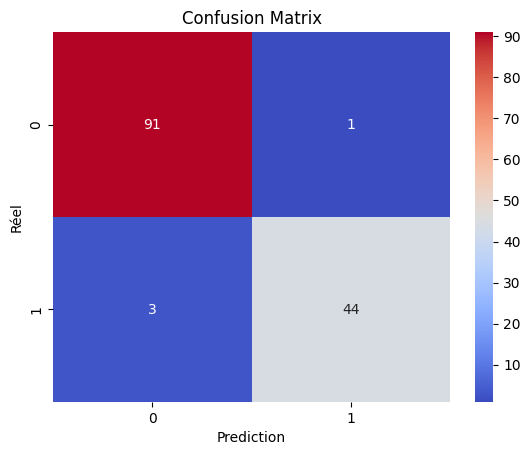

In [182]:
conf_matrix_rl = confusion_matrix(y_test, y_pred_rl)

sns.heatmap(conf_matrix_rl, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Prediction')
plt.ylabel('Réel')

plt.title('Confusion Matrix')
plt.show()

### 6.2 - knn

In [144]:
model_knn = KNeighborsClassifier()

In [145]:
pipeline_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model_knn', model_knn)    
])

In [146]:
pipeline_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_std',
                                                  Pipeline(steps=[('stdScaller',
                                                                   StandardScaler())]),
                                                  ['radius_mean',
                                                   'texture_mean',
                                                   'perimeter_mean',
                                                   'area_mean',
                                                   'smoothness_mean',
                                                   'compactness_mean',
                                                   'concavity_mean',
                                                   'concave points_mean',
                                                   'symmetry_mean', 'radius_se',
                                                   'perimeter_se', 'area_se',
                                                   'compactness_se',
                                                   'concavity_se',
                                                   'concave points_se',
                                                   'fractal_dimension_se',
                                                   'radius_worst',
                                                   'texture_worst',
                                                   'perimeter_worst',
                                                   'area_worst',
                                                   'smoothness_worst',
                                                   'compactness_worst',
                                                   'concavity_worst',
                                                   'concave points_worst',
                                                   'symmetry_worst',
                                                   'fractal_dimension_worst'])])),
                ('model_knn', KNeighborsClassifier())])

In [153]:
y_pred_knn = pipeline_knn.predict(X_test)

In [154]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(f'Accuracy: {accuracy_knn:.4f}')

Accuracy: 0.9712


In [170]:
class_report_knn = classification_report(y_test, y_pred_knn)

print(class_report_knn)

              precision    recall  f1-score   support

           B       0.96      1.00      0.98        92
           M       1.00      0.91      0.96        47

    accuracy                           0.97       139
   macro avg       0.98      0.96      0.97       139
weighted avg       0.97      0.97      0.97       139



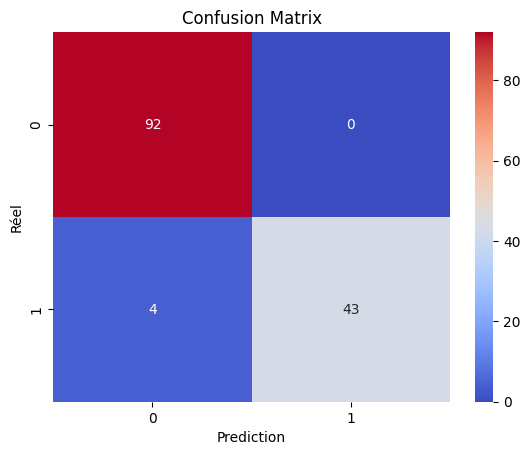

In [180]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Prediction')
plt.ylabel('Réel')
plt.title('Confusion Matrix')
plt.show()

### 6.3 - Random forest classifier

In [157]:
RFC = RandomForestClassifier()

In [158]:
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('random_frorest', RFC)
])

In [159]:
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_std',
                                                  Pipeline(steps=[('stdScaller',
                                                                   StandardScaler())]),
                                                  ['radius_mean',
                                                   'texture_mean',
                                                   'perimeter_mean',
                                                   'area_mean',
                                                   'smoothness_mean',
                                                   'compactness_mean',
                                                   'concavity_mean',
                                                   'concave points_mean',
                                                   'symmetry_mean', 'radius_se',
                                                   'perimeter_se', 'area_se',
                                                   'compactness_se',
                                                   'concavity_se',
                                                   'concave points_se',
                                                   'fractal_dimension_se',
                                                   'radius_worst',
                                                   'texture_worst',
                                                   'perimeter_worst',
                                                   'area_worst',
                                                   'smoothness_worst',
                                                   'compactness_worst',
                                                   'concavity_worst',
                                                   'concave points_worst',
                                                   'symmetry_worst',
                                                   'fractal_dimension_worst'])])),
                ('random_frorest', RandomForestClassifier())])

In [174]:
y_pred_rfc = pipeline_rf.predict(X_test)

In [175]:
accuracy_rf = accuracy_score(y_test, y_pred_rfc)

print(f'Accuracy: {accuracy_rf:.4f}')

Accuracy: 0.9712


In [176]:
class_report_rfc = classification_report(y_test, y_pred_rfc)

print(class_report_rfc)

              precision    recall  f1-score   support

           B       0.97      0.99      0.98        92
           M       0.98      0.94      0.96        47

    accuracy                           0.97       139
   macro avg       0.97      0.96      0.97       139
weighted avg       0.97      0.97      0.97       139



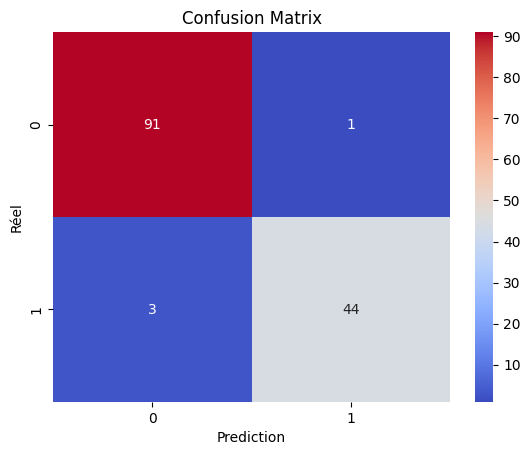

In [181]:
conf_matrix_rfc = confusion_matrix(y_test, y_pred_rfc)

sns.heatmap(conf_matrix_rfc, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Prediction')
plt.ylabel('Réel')
plt.title('Confusion Matrix')
plt.show()